# Qantas Flight Data Analysis - GitHub

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Unnamed: 0,aobt,iobt,aircraft,eibt,iibt,eobt,aibt,eff_start,eff_end,flight
0,141,NaN,NaN,NaN,1.655960e+12,NaN,1.655954e+12,NaN,2022-03-20 00:18:00.839,2022-06-18 18:35:13.543,QF_529_BNE_SYD_22-06-23
1,142,NaN,NaN,VHVXF,1.655960e+12,NaN,1.655954e+12,NaN,2022-06-18 18:35:13.543,2022-06-19 23:21:51.331,QF_529_BNE_SYD_22-06-23
2,143,NaN,NaN,VHVXQ,1.655960e+12,NaN,1.655954e+12,NaN,2022-06-19 23:21:51.331,2022-06-20 22:26:51.512,QF_529_BNE_SYD_22-06-23
3,144,NaN,NaN,VHVXM,1.655960e+12,NaN,1.655954e+12,NaN,2022-06-20 22:26:51.512,2022-06-21 01:23:55.379,QF_529_BNE_SYD_22-06-23
4,145,NaN,NaN,VHVXQ,1.655960e+12,NaN,1.655954e+12,NaN,2022-06-21 01:23:55.379,2022-06-21 15:54:04.405,QF_529_BNE_SYD_22-06-23


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143658 entries, 0 to 143657
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  143658 non-null  int64  
 1   aobt        70910 non-null   float64
 2   iobt        125133 non-null  float64
 3   aircraft    141060 non-null  object 
 4   eibt        143633 non-null  float64
 5   iibt        125133 non-null  float64
 6   eobt        143633 non-null  float64
 7   aibt        9630 non-null    float64
 8   eff_start   143658 non-null  object 
 9   eff_end     141242 non-null  object 
 10  flight      143658 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 12.1+ MB


## Data Type Corrections

### Convert timestapms to datetime format:

The columns "eibt", "eobt", "aibt", "aobt", "iibt", and "iobt" contain UNIX timestamps in milliseconds, as they have 13 or more digits.

The columns "eff_start" "eff_end" are in object format.

All these columns need to be converted into a readable datetime format.

In [5]:
timestamp_cols = ["eibt", "eobt", "aibt", "aobt", "iibt", "iobt"]

for col in timestamp_cols:
    data[col] = pd.to_datetime(data[col], unit="ms", errors='coerce')

In [6]:
data["eff_start"] = pd.to_datetime(data["eff_start"], errors='coerce')
data["eff_end"] = pd.to_datetime(data["eff_end"], errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143658 entries, 0 to 143657
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  143658 non-null  int64         
 1   aobt        70910 non-null   datetime64[ns]
 2   iobt        125133 non-null  datetime64[ns]
 3   aircraft    141060 non-null  object        
 4   eibt        143633 non-null  datetime64[ns]
 5   iibt        125133 non-null  datetime64[ns]
 6   eobt        143633 non-null  datetime64[ns]
 7   aibt        9630 non-null    datetime64[ns]
 8   eff_start   143658 non-null  datetime64[ns]
 9   eff_end     141242 non-null  datetime64[ns]
 10  flight      143658 non-null  object        
dtypes: datetime64[ns](8), int64(1), object(2)
memory usage: 12.1+ MB


In [8]:
data.head()

,Unnamed: 0,aobt,iobt,aircraft,eibt,iibt,eobt,aibt,eff_start,eff_end,flight
0,141,NaT,NaT,NaN,2022-06-23 04:45:00,NaT,2022-06-23 03:10:00,NaT,2022-03-20 00:18:00.839,2022-06-18 18:35:13.543,QF_529_BNE_SYD_22-06-23
1,142,NaT,NaT,VHVXF,2022-06-23 04:45:00,NaT,2022-06-23 03:10:00,NaT,2022-06-18 18:35:13.543,2022-06-19 23:21:51.331,QF_529_BNE_SYD_22-06-23
2,143,NaT,NaT,VHVXQ,2022-06-23 04:45:00,NaT,2022-06-23 03:10:00,NaT,2022-06-19 23:21:51.331,2022-06-20 22:26:51.512,QF_529_BNE_SYD_22-06-23
3,144,NaT,NaT,VHVXM,2022-06-23 04:45:00,NaT,2022-06-23 03:10:00,NaT,2022-06-20 22:26:51.512,2022-06-21 01:23:55.379,QF_529_BNE_SYD_22-06-23
4,145,NaT,NaT,VHVXQ,2022-06-23 04:45:00,NaT,2022-06-23 03:10:00,NaT,2022-06-21 01:23:55.379,2022-06-21 15:54:04.405,QF_529_BNE_SYD_22-06-23


### Converting "aircraft" to category format:

We have only 95 unique values in the aircraft column. By converting it to the category data type, we can reduce memory usage and speed up operations like grouping.

In [9]:
data['aircraft'].nunique()

95

In [10]:
data['aircraft'] = data['aircraft'].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143658 entries, 0 to 143657
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  143658 non-null  int64         
 1   aobt        70910 non-null   datetime64[ns]
 2   iobt        125133 non-null  datetime64[ns]
 3   aircraft    141060 non-null  category      
 4   eibt        143633 non-null  datetime64[ns]
 5   iibt        125133 non-null  datetime64[ns]
 6   eobt        143633 non-null  datetime64[ns]
 7   aibt        9630 non-null    datetime64[ns]
 8   eff_start   143658 non-null  datetime64[ns]
 9   eff_end     141242 non-null  datetime64[ns]
 10  flight      143658 non-null  object        
dtypes: category(1), datetime64[ns](8), int64(1), object(1)
memory usage: 11.1+ MB


In [12]:
data.isnull().sum()

Unnamed: 0         0
aobt           72748
iobt           18525
aircraft        2598
eibt              25
iibt           18525
eobt              25
aibt          134028
eff_start          0
eff_end         2416
flight             0
dtype: int64

## Handling Missing Values

Let's calculate missing value percentages.

In [13]:
data.isnull().sum() / len(data) * 100

Unnamed: 0     0.000000
aobt          50.639714
iobt          12.895209
aircraft       1.808462
eibt           0.017402
iibt          12.895209
eobt           0.017402
aibt          93.296579
eff_start      0.000000
eff_end        1.681772
flight         0.000000
dtype: float64

In [14]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
data = data.dropna(subset=["aircraft"])

In [16]:
data = data.dropna(subset=['eff_end'])

In [17]:
data.isnull().sum() / len(data) * 100

aobt         50.441418
iobt         11.128502
aircraft      0.000000
eibt          0.017311
iibt         11.128502
eobt          0.017311
aibt         94.619313
eff_start     0.000000
eff_end       0.000000
flight        0.000000
dtype: float64

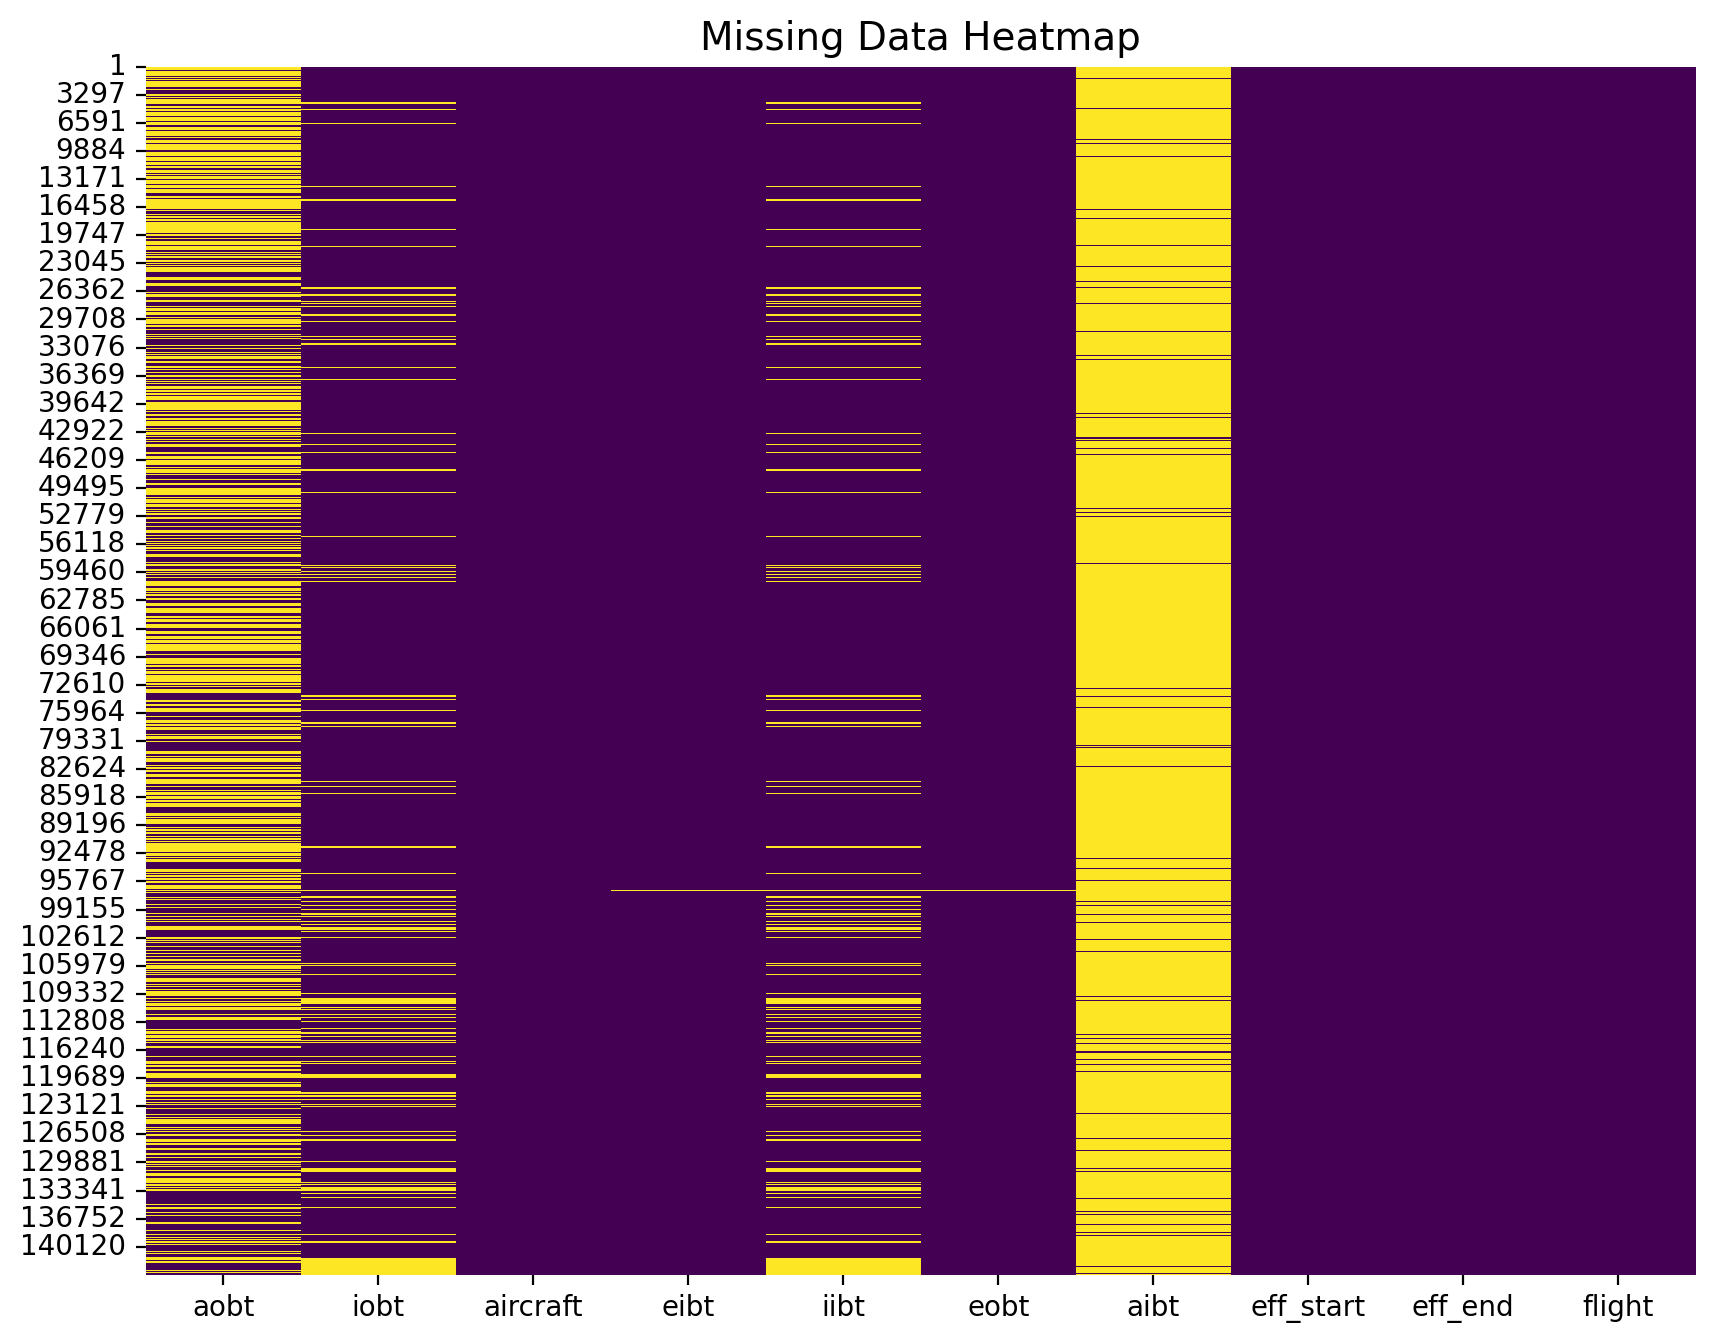

In [19]:
plt.figure(figsize=(10, 8), dpi=200)
plt.gcf().patch.set_facecolor('white')
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap", fontsize=14)
plt.savefig("images/missing_data.png", dpi=250, bbox_inches='tight')  
plt.show()

In [20]:
missing_flights = data[(data["iobt"].isnull()) & (data["iibt"].isnull()) & (data["aobt"].isnull())]

missing_flights.shape[0]

10592

The missing values in the iobt and iibt columns do not appear to be random; they seem to correspond to the same flights.

This suggests a general lack of data for these flights. It is possible that some flights were either not recorded or canceled. Therefore, it makes sense to drop rows with missing iobt values.

In [21]:
data = data.dropna(subset=['iobt'])

In [22]:
data.isnull().sum()

aobt          59342
iobt              0
aircraft          0
eibt              0
iibt              0
eobt              0
aibt         116603
eff_start         0
eff_end           0
flight            0
dtype: int64

Let’s create scatterplot to see the relationship between **eobt** (estimated off-block time) and **aobt**.

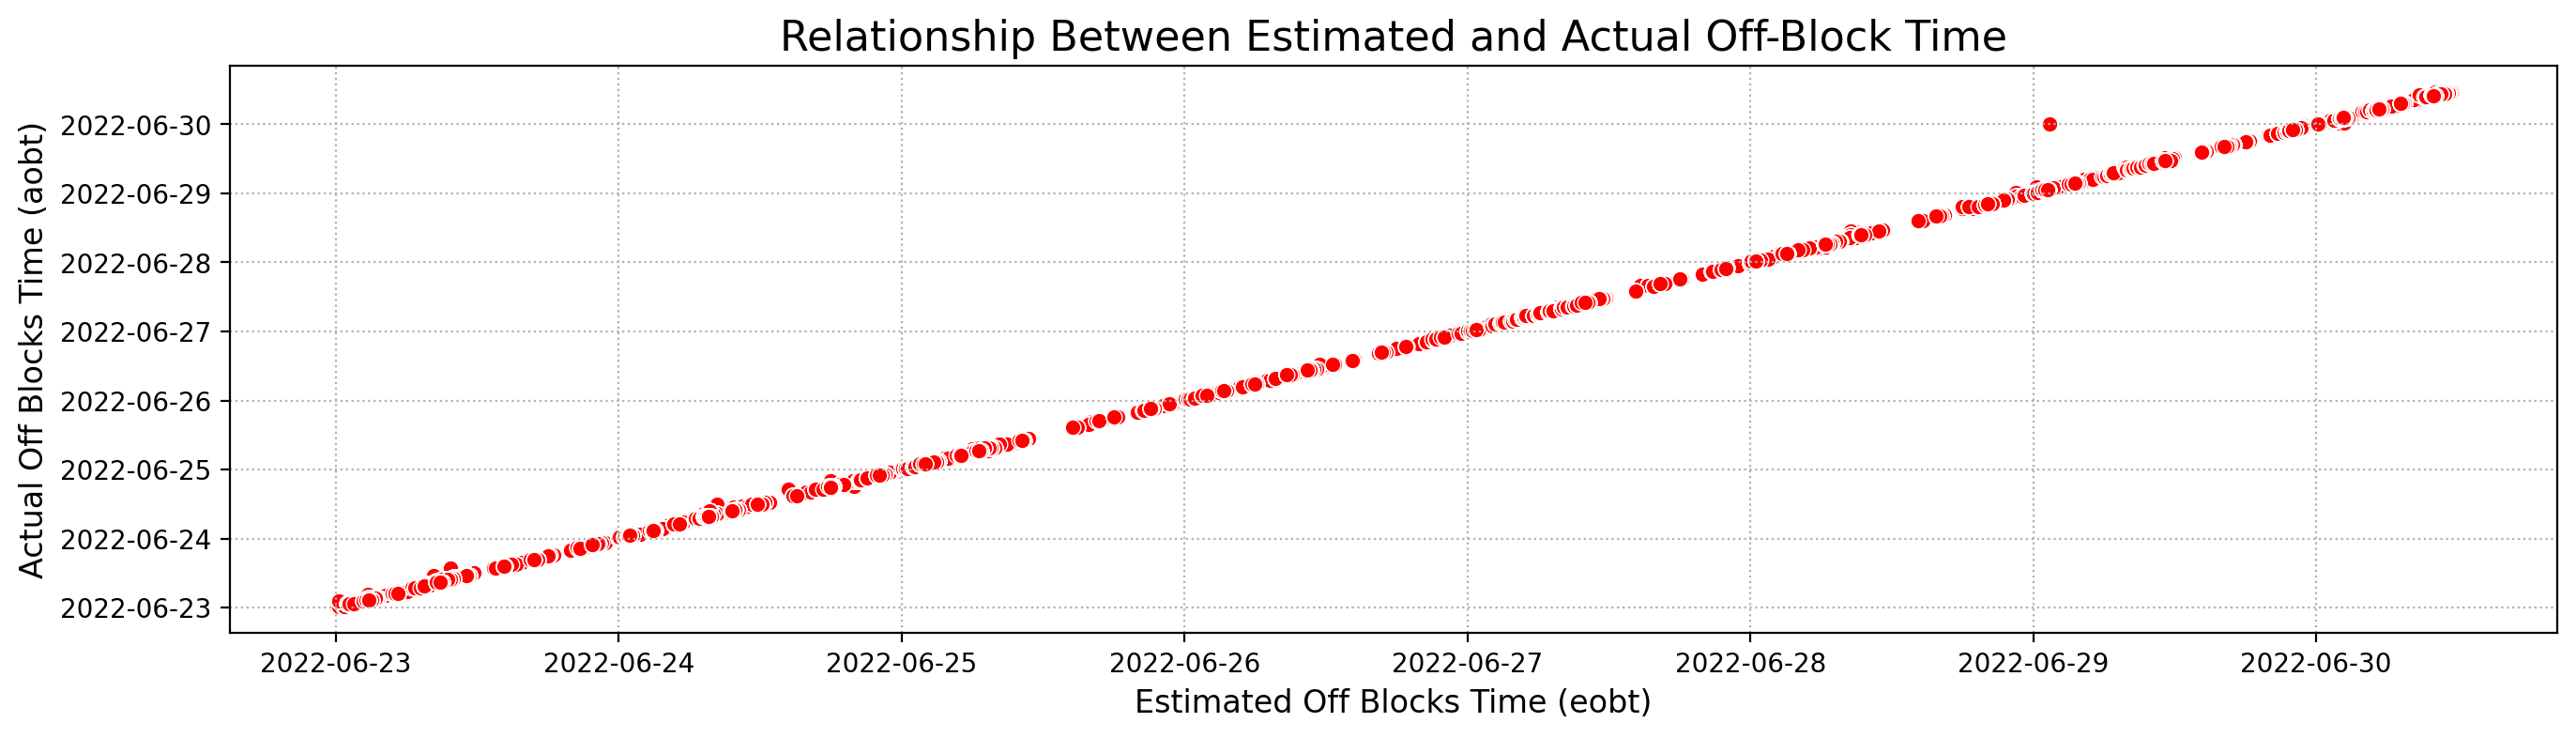

In [24]:
plt.figure(figsize=(16, 4), dpi=200)
plt.gcf().patch.set_facecolor('white')
sns.scatterplot(x=data['eobt'], y=data['aobt'], color="red")

plt.title("Relationship Between Estimated and Actual Off-Block Time", fontsize=16)
plt.xlabel("Estimated Off Blocks Time (eobt)", fontsize=12)
plt.ylabel("Actual Off Blocks Time (aobt)", fontsize=12)

plt.grid(True, linestyle="dotted")
plt.savefig("images/eobt-aobt.png", dpi=250, bbox_inches='tight')  
plt.show()

We observe a strong relationship. Using **eobt** to fill in the missing values for **aobt** seems like a reasonable solution to approximate the actual values. 

However, this approach means that the analysis will be based on estimated values rather than actual values when answering the questions.

In [25]:
data['aobt'] = data['aobt'].fillna(data['eobt'])

In [26]:
data.isnull().sum() / len(data) * 100

aobt          0.00000
iobt          0.00000
aircraft      0.00000
eibt          0.00000
iibt          0.00000
eobt          0.00000
aibt         94.63377
eff_start     0.00000
eff_end       0.00000
flight        0.00000
dtype: float64

The **aibt** column has missing values for almost all entries.

Before proceeding, let’s extract the Destination from the Flight ID column and analyze the missing **aibt** values based on terminals.

In [27]:
data["origin"] = data["flight"].str.split("_").str[2]
data["destination"] = data["flight"].str.split("_").str[3]

In [28]:
missing_aibt = data[data["aibt"].isnull()]["destination"].value_counts()
missing_aibt

SYD     38744
MEL     28658
BNE     25790
PER     16894
ADL      1280
ZNE       703
KTA       697
PHE       551
BME       442
GBW       405
CBR       360
LEA       328
DRW       320
SLJ       255
HBA       205
KGI       189
OOL       184
CKW       176
KFE       166
ASP       136
IBM        52
WLP        31
YWGA       26
GYB        11
Name: destination, dtype: int64

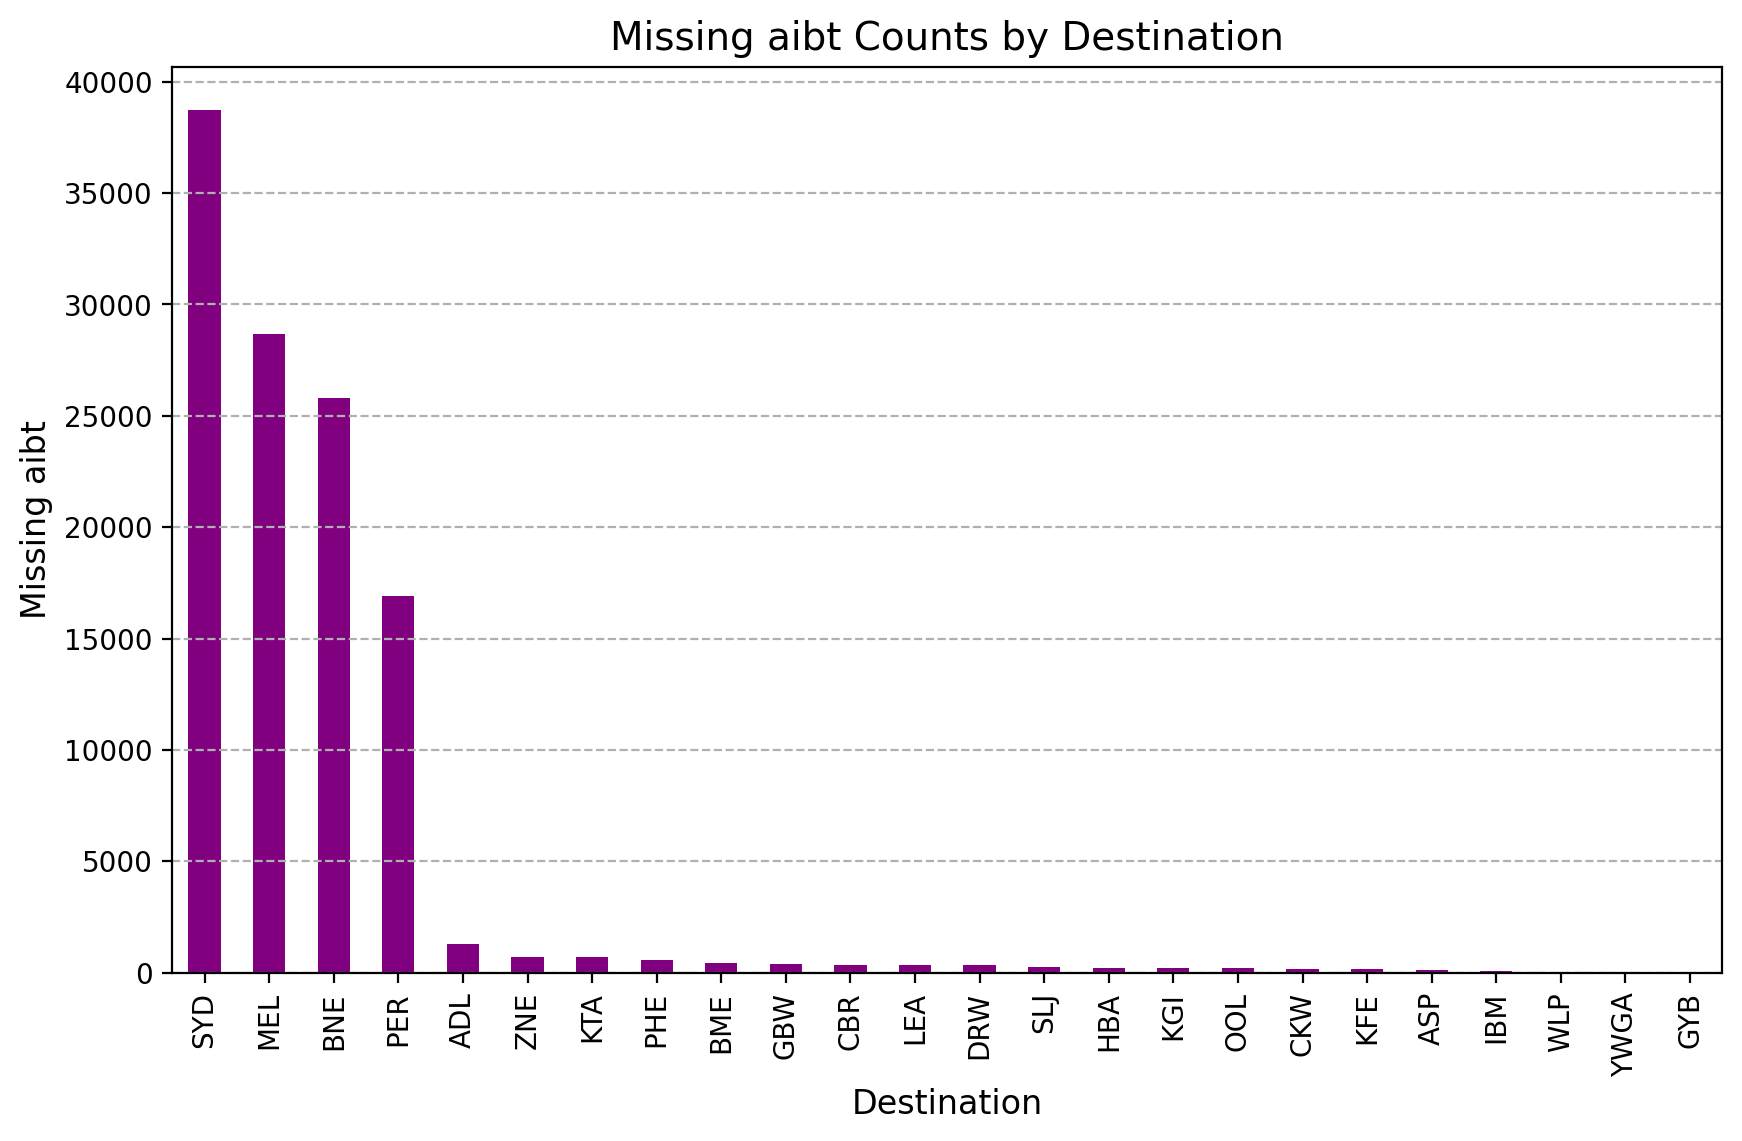

In [29]:
plt.figure(figsize=(10, 6), dpi=200)
missing_aibt.plot(kind="bar", color="purple")
plt.gcf().patch.set_facecolor('white')

plt.title("Missing aibt Counts by Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Missing aibt", fontsize=12)
plt.grid(axis='y', linestyle="--")
plt.savefig("images/missing_aib_dest.png", dpi=250, bbox_inches='tight')  
plt.show()

This analysis shows that missing aibt values are particularly concentrated at major terminals.

The high number of missing values at major terminals may indicate a problem in data recording or specific operations.

Now, let's analyse the relationship between **aibt** and **eibt**.

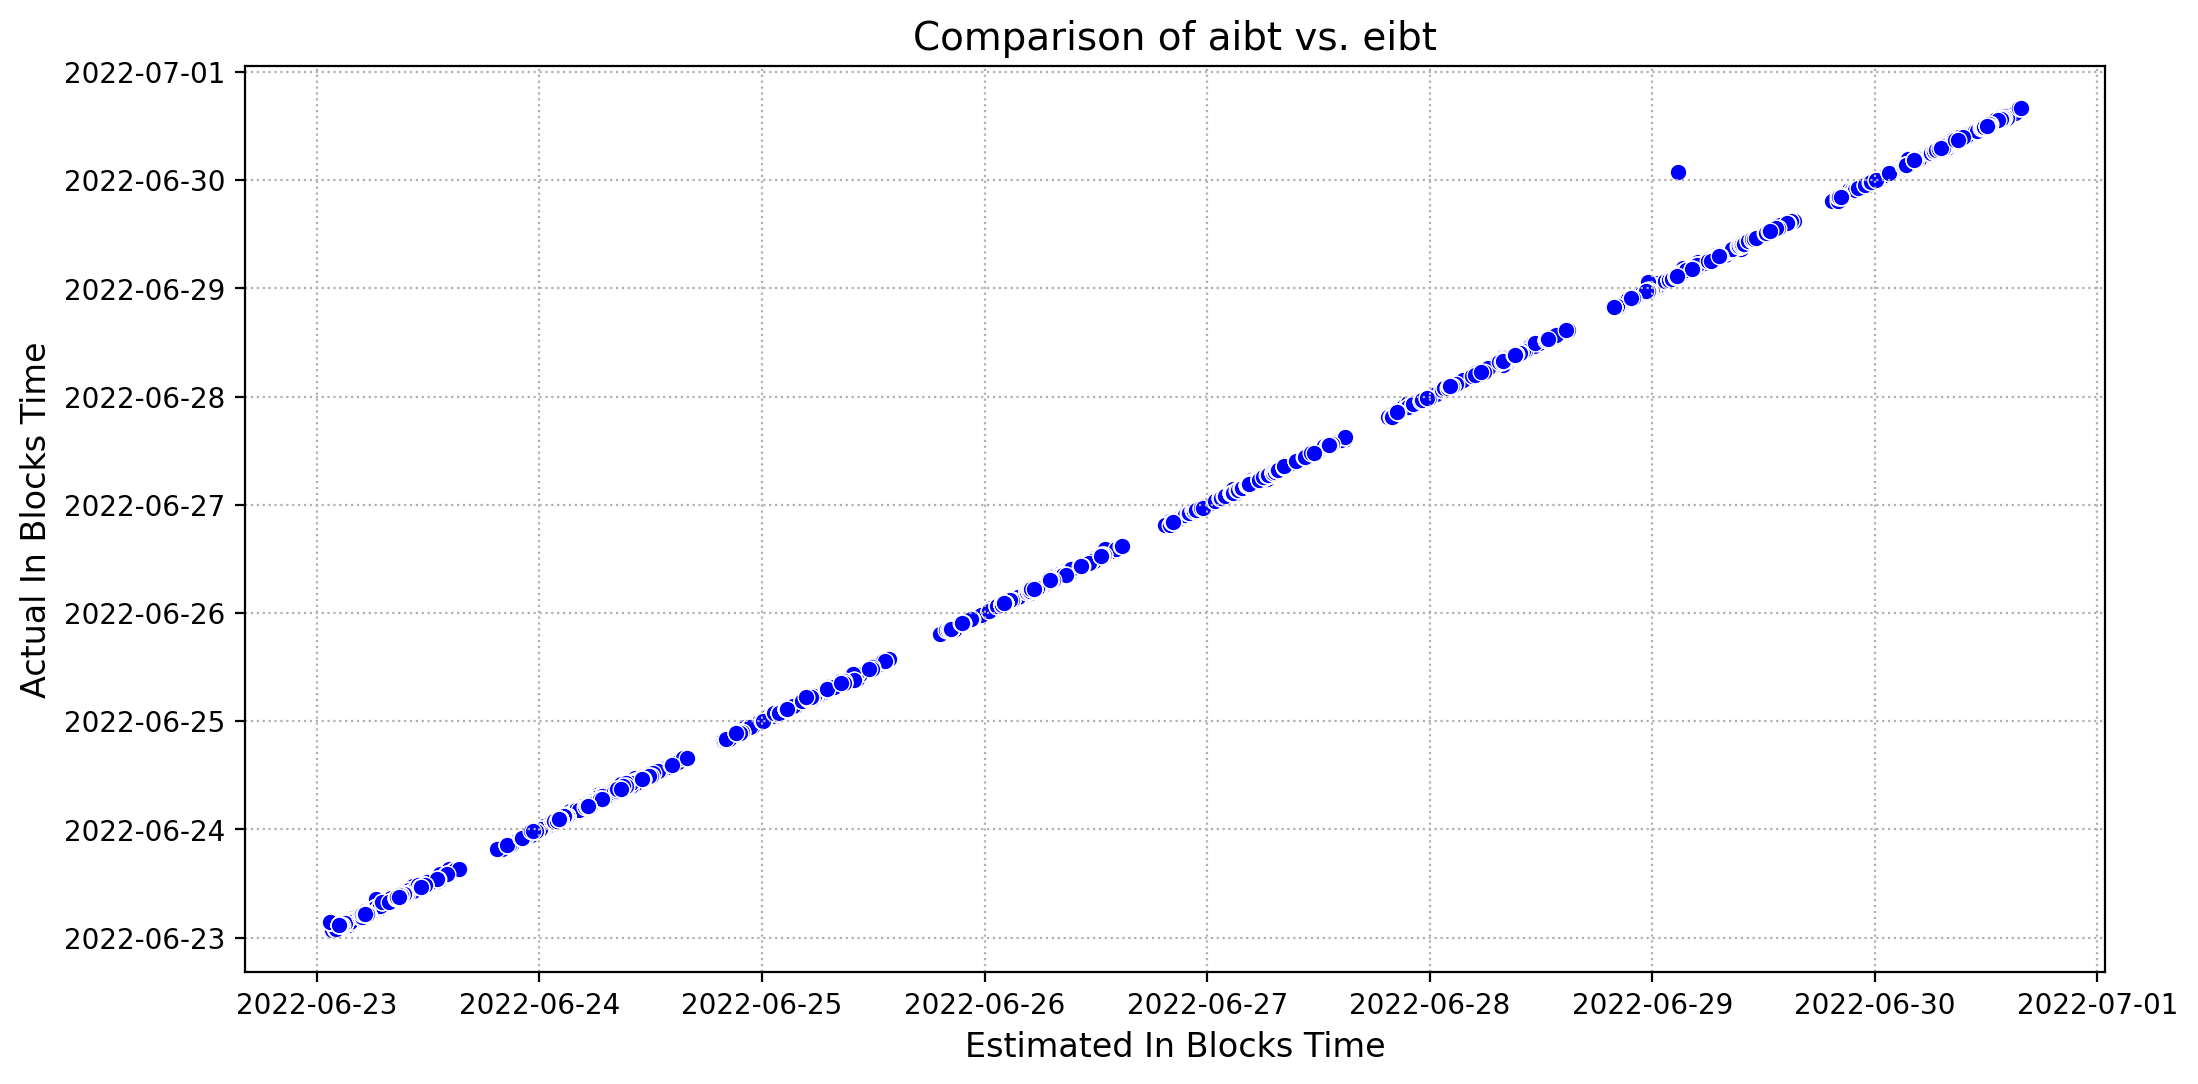

In [30]:
plt.figure(figsize=(12, 6), dpi=200)
plt.gcf().patch.set_facecolor('white')
sns.scatterplot(x=data['eibt'], y=data['aibt'], color="blue")

plt.title("Comparison of aibt vs. eibt", fontsize=14)
plt.xlabel("Estimated In Blocks Time", fontsize=12)
plt.ylabel("Actual In Blocks Time", fontsize=12)

plt.grid(True, linestyle="dotted")
plt.savefig("images/aibt_vs_eibt.png", dpi=250, bbox_inches='tight') 
plt.show()

In [31]:
data["eibt_aibt_diff"] = (data["aibt"] - data["eibt"]).dt.total_seconds() / 60

In [32]:
mean_diff = data["eibt_aibt_diff"].mean()
median_diff = data["eibt_aibt_diff"].median()

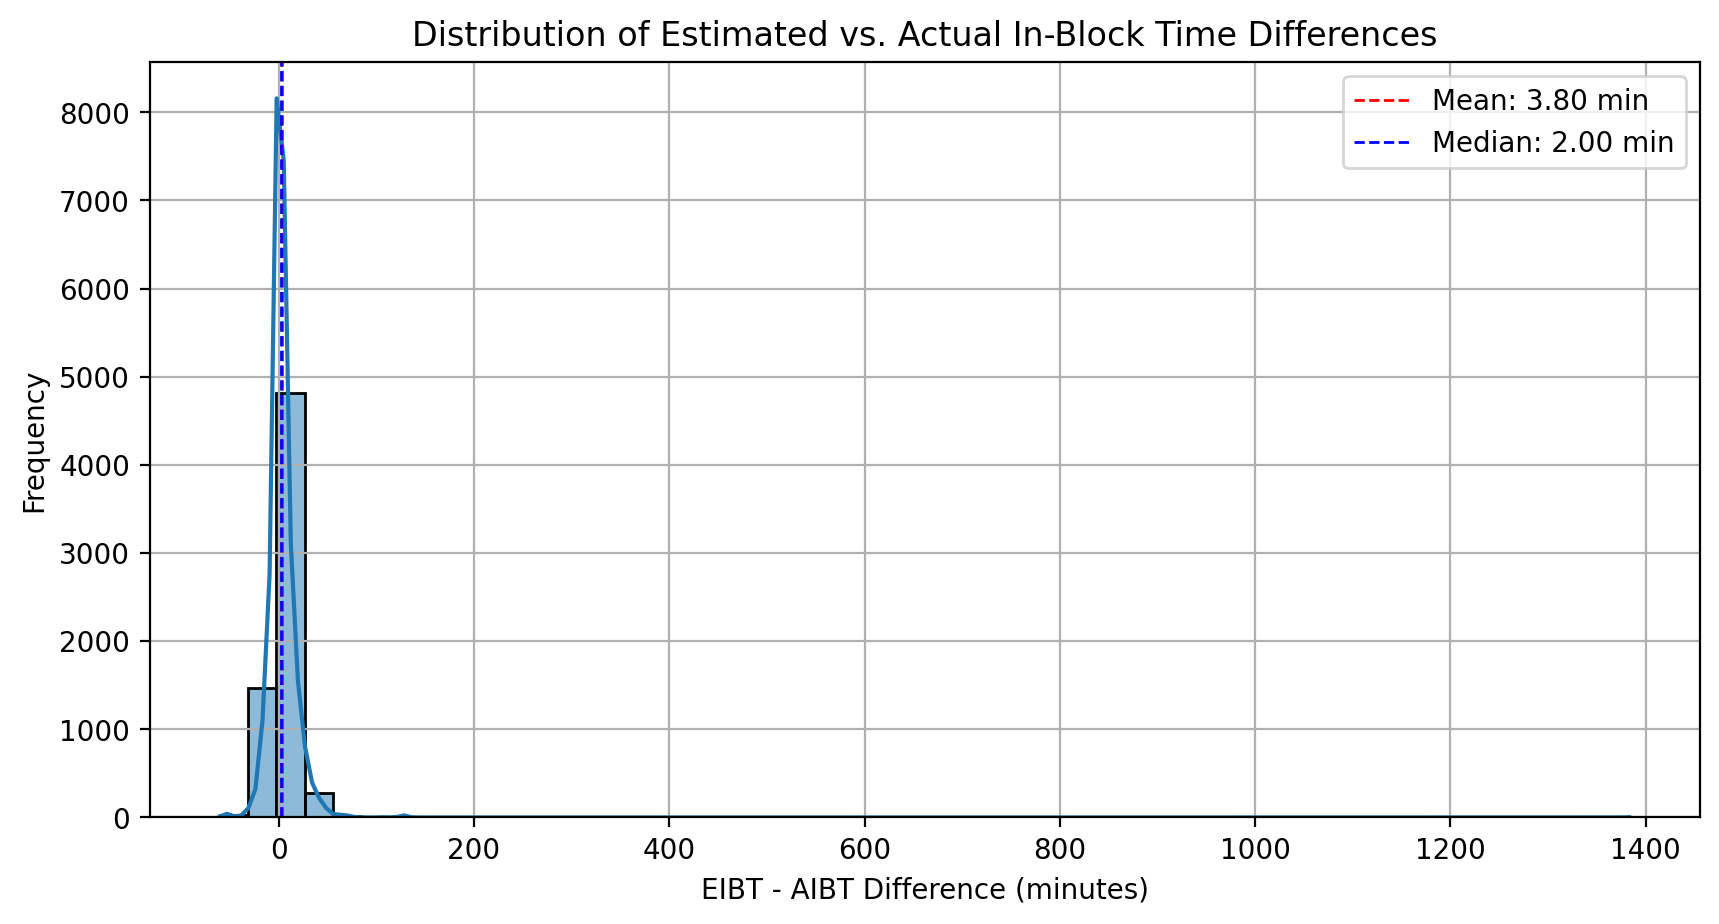

(3.795977011494253, 2.0000000000000004)

In [33]:
plt.figure(figsize=(10, 5), dpi=200)
plt.gcf().patch.set_facecolor('white')
sns.histplot(data["eibt_aibt_diff"].dropna(), bins=50, kde=True)
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_diff:.2f} min")
plt.axvline(median_diff, color='blue', linestyle='dashed', linewidth=1, label=f"Median: {median_diff:.2f} min")
plt.xlabel("EIBT - AIBT Difference (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated vs. Actual In-Block Time Differences")
plt.legend()
plt.grid(True)
plt.savefig("images/differences.png", dpi=250, bbox_inches='tight')
plt.show()


mean_diff, median_diff

The difference between **eibt** and **aibt** is minimal (2-3 minutes).

Therefore, filling in missing **aibt** values directly using **eibt** is a logical approach.

In [34]:
data['aibt'] = data['aibt'].fillna(data['eibt'])

data.isnull().sum()

aobt                   0
iobt                   0
aircraft               0
eibt                   0
iibt                   0
eobt                   0
aibt                   0
eff_start              0
eff_end                0
flight                 0
origin                 0
destination            0
eibt_aibt_diff    116603
dtype: int64